In [4]:
#@title
# Bibliotecas utlizadas
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys

# **SME0142 - Álgebra Linear e Aplicações**
Docente: Cynthia de Oliveira Lage Ferreira


# **Trabalho Final**
Novembro de 2022

# Aluno: Arthur Hiratsuka Rezende

 NUSP: 13687108

# Introdução e motivação

Redes complexas podem representar diversos fenômenos através de grafos, permitindo modelar quantidades massivas de dados, e resultam em visualizações claras de comunidades, conectividade entre membros e medidas de relação entre os dados.

Por sua relativa simplicidade algébrica (aplicação em forma matricial, uso de auto-valores e auto-vetores, combinações e somatórios), essa ferramenta permite aplicação massiva computacionalmente, de forma que a manipulação dos dados toma forma direta e ágil. Algumas das medidas das redes complexas são: distâncias, coeficiente de aglomeração, medidas de conexão, caminhos, comunidades, link betweeness (caminhos que passam pelo link), etc.

Por se tratar de uma ferramenta computacional que permite a manipulação massiva de dados, busca-se elucidar os principais parâmetros e aplicações de Redes Complexas, fazendo uso do data set Zachary's Karate Club, um exemplo clássico de redes complexas. Esse data set representa uma rede social formada por 34 membros de um clube de karate, estudado por W. Zachary entre 1970 e 1972, a qual, em dado ponto, houve uma ruptura entre o professor (nó 0) e o administrador (nó 33), de forma que o grupo original dividiu-se em 2. O estudo conduzido por Zachary buscou prever qual grupo cada aluno optaria, com base em relações entre os membros observadas pelo mesmo, e aplicando o algoritimo Ford–Fulkerson (otimização maximum flow – minimum cut) no grafo, acertou todos as revisões, excetuado o aluno #9. 

Desta maneira, no presente trabalho, busca-se calcular as principais medidas e parâmetros de redes complexas no data set escolhido, a fim de se observar se os resultados obtidos são verossímeis, e como a aplicação computacional de conceitos da álgebra linear são relevantes nesse tipo de estudo.

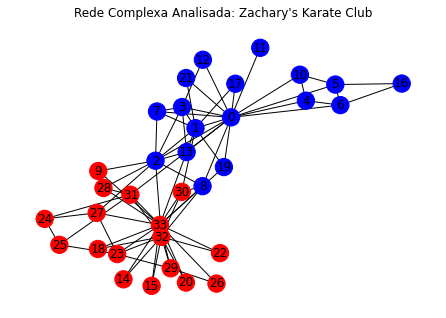

In [5]:
#@title
# Rede Zachary's Karate Club
karate_club = nx.karate_club_graph()

# Cada vértice representa um aluno e a cor do vértice seria o grupo (professor) 
# que o aluno pertence

group = []

for i in karate_club.nodes():
    if karate_club.nodes[i]['club'] == 'Mr. Hi':
        group.append('blue')
    else: group.append('red')

nx.draw(karate_club, node_size=300, node_color=group, with_labels=True)
plt.title("Rede Complexa Analisada: Zachary's Karate Club")
plt.show()

# Matriz de Adjacência e Medidas de Centralidade

## Matriz de adjacência e caminhos
A matriz de adjacência, para grafos não direcionados, é uma matriz $n$ x $n$, na forma $A = [x_{ij}]$, definida como:

$x _{ij} = 1$ se houver conexão entre os vértices $v_i$ e $v_j$.

$x_{ij} = 0$ se não houver conexão entre os vértices $v_i$ e $v_j$.

Resultado dessa construção, em grafos não direcionados a matriz de adjacência é simetrica. Uma propriedade interessante dessa matriz é que, aplicada uma potência na forma $Y = A^k$, cada elemento $y_{ij}$ da matriz $Y$ resultante é o número de caminhos de tamanho $k$ entre os vértices $v_i$ e $v_j$. Portanto, é possível definir que o caminho, de tamanho $k$, entre vértices  pode ser calculado através da seguinte combinação linear:

$$y_{ij} = \sum_{j=0}^n x _{ij} * x _{ji}$$

In [6]:
#@title
adj_matrix = nx.adjacency_matrix(karate_club)
np.set_printoptions(threshold=sys.maxsize)
print("\033[1mMatriz de adjacência:\033[0m")
with np.printoptions(precision=3, suppress=True):
    print(adj_matrix.todense())
    
print("\n\033[1mNúmero de caminhos de tamanho 2 entre o vértice #0 e o vértice #x:\033[0m")
A = adj_matrix @ adj_matrix
print(A[0])

Matriz de adjacência:
[[0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
 [1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## Centralidade

O parâmetro de centralidade, na teoria dos grafos, pode ser definido como uma medida da importância de dado vértice, refletindo o quão relevante o vértice é com base em suas conexões.
São apresentadas, no presente trabalho, 4 medidas de centralidade: Eigenvector , Centralidade de Katz, Pagerank e Betweenness Centrality. 

### Centralidade Eigenvector

Nesse método, um vértice é importante se ele é conectado com outros vértices também importantes, sendo que essa medida de centralidade retorna o auto-valor associado ao maior auto-vetor, e definido como:

$$x'_i = \sum_{j} A _{ij}  x _{j}$$

$$x(t)= A^t x(0)$$

$$x(t) = A^t \sum_{i} c_i v_i = \sum_{i} c_i \lambda^t_i v_i = \lambda^t_1 \sum_{i} c_i [\frac{\lambda_i}{\lambda_1}]^t v_i $$

$$ t \to \infty: x(t) = c_1 \lambda^t_1 v_1$$

$$x_i = \lambda^{-1}_1 \sum_{j} A _{ij}  x _{j}$$

$$ x_i \lambda = A x$$

Onde:

- A é a matriz de adjacência do grafo;

- $x_i$ é o vértice de interesse;

- $\lambda$ é o maior auto-valor associado ao maior auto-vetor


De acordo com a documentação da função nx.eigenvector_centrality(), os seguintes pontos podem ser destacados:

- Pelo teorema de Perron-Frobenius, existe uma única solução, cujas entradas são sempre positivas, se $\lambda$ for o maior auto-valor associado a matriz de adjacência A.

- Devido a utilização do método das potências para calcular $\lambda$, a convergência não é garantida. O critério de parada é o número máximo de iterações (default = 100) ou quando a diferença do autovalor entre duas iterações for menor que uma tolerância (default = 1.0e-6);


Centralidade Eigenvector de cada vértice:
0 		 0.36
1 		 0.27
2 		 0.32
3 		 0.21
4 		 0.08
5 		 0.08
6 		 0.08
7 		 0.17
8 		 0.23
9 		 0.10
10 		 0.08
11 		 0.05
12 		 0.08
13 		 0.23
14 		 0.10
15 		 0.10
16 		 0.02
17 		 0.09
18 		 0.10
19 		 0.15
20 		 0.10
21 		 0.09
22 		 0.10
23 		 0.15
24 		 0.06
25 		 0.06
26 		 0.08
27 		 0.13
28 		 0.13
29 		 0.13
30 		 0.17
31 		 0.19
32 		 0.31
33 		 0.37

Grafo com tamanho dos vértices proporcional à Centralidade Eigenvector:


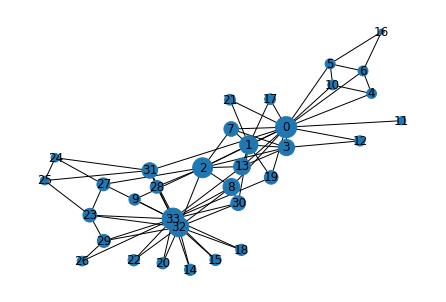

In [7]:
#@title
# Centralidade Eigenvector
print('\033[1mCentralidade Eigenvector de cada vértice:\033[0m')
size_factor = []
for node, val in nx.eigenvector_centrality(karate_club).items():
    print("%s \t\t %.2f" % (node, val))
    size_factor.append(val*1250)

print('\033[1m\nGrafo com tamanho dos vértices proporcional à Centralidade Eigenvector:\033[0m')
nx.draw(karate_club, node_size=size_factor, with_labels=True)
plt.show()

### Centralidade de Katz

Nesse método, calcula-se a centralidade de um vértice baseado na centralidade se seus vizinho, sendo uma generalização do método de Centralidade Eigenvector, sendo calculada da seguinte maneira:

$$x_i = \alpha \sum_{j} A _{ij}  x _{j} + \beta $$

Onde:

- A é a matriz de adjacência do grafo com autovalores $\lambda$;

- $x_i$ é o vértice de interesse;

- $\beta$ é um parâmetro de controle da centralidade inicial, ou seja, um peso atribuído aos vizinhos imediatamente próximos, e

- $\alpha < \frac{1}{\lambda_{max}}$ é um fator de atenuação da influência de conexões com vizinhos distantes.

É válido ressaltar que quando $\alpha = \frac{1}{\lambda_{max}}$ e $\beta = 0$ tem-se a Centralidade Eigenvector.

A centralidade de Katz calcula a relevância de dado vértice a partir do número imediato de vizinhos do nó e também dos outros nós conectados a estes, sendo que o parâmetro $\beta$ permite definir um peso aos vizinhos imediatos, tornando-os mais influentes para o cálculo da centralidade do vértice observado, e a importância da influência de nós distantes é atenuada através do parâmetro $\alpha$, que tem seu valor limitado conforme definido acima.

Centralidade de Katz de cada vértice (alpha = 0.01):
0 0.19
1 0.18
2 0.18
3 0.17
4 0.17
5 0.17
6 0.17
7 0.17
8 0.17
9 0.17
10 0.17
11 0.17
12 0.17
13 0.17
14 0.17
15 0.17
16 0.17
17 0.17
18 0.17
19 0.17
20 0.17
21 0.17
22 0.17
23 0.17
24 0.17
25 0.17
26 0.17
27 0.17
28 0.17
29 0.17
30 0.17
31 0.17
32 0.18
33 0.19

Grafo com tamanho dos vértices proporcional à Centralidade de Katz:


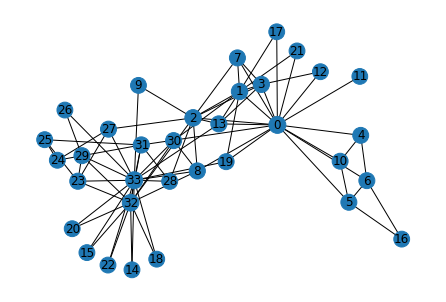

In [8]:
#@title
# Centralidade de Katz
print('\033[1mCentralidade de Katz de cada vértice (alpha = 0.01):\033[0m')
# os nomes dos parâmetros são diretamente adaptados do método apresentado na aula teórica
alpha = 0.01
beta = 1.0
size_factor = []
for node, val in nx.katz_centrality(karate_club, alpha=alpha, beta=beta).items():
    print("%s %.2f" % (node, val))
    size_factor.append(val*1500)

print('\033[1m\nGrafo com tamanho dos vértices proporcional à Centralidade de Katz:\033[0m')
nx.draw(karate_club, node_size=size_factor, with_labels=True)
plt.show()

Centralidade de Katz de cada vértice (alpha = 0.1):
0 0.32
1 0.24
2 0.27
3 0.19
4 0.12
5 0.13
6 0.13
7 0.17
8 0.20
9 0.12
10 0.12
11 0.10
12 0.12
13 0.20
14 0.13
15 0.13
16 0.09
17 0.12
18 0.13
19 0.15
20 0.13
21 0.12
22 0.13
23 0.17
24 0.11
25 0.11
26 0.11
27 0.15
28 0.14
29 0.15
30 0.17
31 0.19
32 0.28
33 0.33

Grafo com tamanho dos vértices proporcional à Centralidade de Katz:


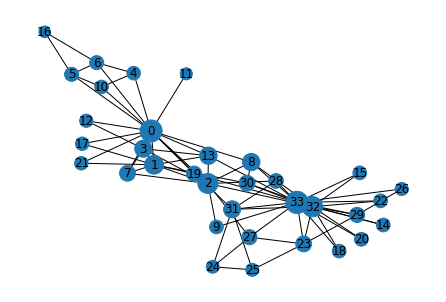

In [9]:
#@title
# Centralidade de Katz
print('\033[1mCentralidade de Katz de cada vértice (alpha = 0.1):\033[0m')
# os nomes dos parâmetros são diretamente adaptados do método apresentado na aula teórica
alpha = 0.1
beta = 1
size_factor = []
for node, val in nx.katz_centrality(karate_club, alpha=alpha, beta=beta).items():
    print("%s %.2f" % (node, val))
    size_factor.append(val*1500)

print('\033[1m\nGrafo com tamanho dos vértices proporcional à Centralidade de Katz:\033[0m')
nx.draw(karate_club, node_size=size_factor, with_labels=True)
plt.show()

### PageRank

Originalmente desenvolvido para rankear páginas web, esse algoritmo foi concebido para grafos direcionados, porém, de acordo com a documentação no NetworkX, a implementação dessa biblioteca converte cada aresta de grafos não direcionados em 2 arestas. O algoritimo Pagerank tem viés probabilístico, que busca retorna a probabilidade de dado site ser visitado em certo instante durante um passeio aleatório infinito.

Sendo a matriz estocástica $A \in M(n,n)$ e o vetor estocástico $p \in \mathbb{R}^n$ e $p^t$ a distribuição de probabilidade no tempo $t$, pode-se descobrir a distribuição no tempo $t + k$ da seguinte maneira:

$$p^{t+k} = A^k p(t) $$

Uma vez que o Método das Potências assegura a convergência do Processo de Markov, tem-se que:

$$ p^{(k)} \to v$$

Em que $v$ é o vetor estacionário de $A$. A implementação da biblioteca NetworkX utiliza o método das potências para calcular o autovetor, mas pela documentação a convergência não é garantida. O critério de parada é o número máximo de iterações (default = 100) ou quando a diferença do autovalor entre duas iterações for menor que uma tolerância (default = 1.0e-6);

Representando um grafo direcionado (implementação original do algoritmo) como uma matriz de conectividade $A$, em que $a_{ij}$ = 1 se exite um link entre $j \to i$ e 0 casos contrário. A seguir transforma-se a matriz de conectividade em uma matriz estocástica $P$ da seguinte maneira:

$p_{ij} = \frac{a_{ij}}{c_j}$ se $c_j \neq 0$ e 0 casos contrário.

com  $c_j = \alpha \sum_{i=1}^n a _{ij}$

Para resolver caminhos sem saída, utiliza-se um vetor $d \in \mathbb{R}^n$, sendo $d_j = \frac{1}{n}$ se $c_j = 0$ e 0 casos contrário.

Por fim, obtem-se a seguinte matriz $G$:

$G = \alpha(A + \mathbb{1}d^T) + (1 - \alpha)\frac{\mathbb{1}\mathbb{1}^T}{n}$

Pagerank:
0 0.10
1 0.05
2 0.06
3 0.04
4 0.02
5 0.03
6 0.03
7 0.02
8 0.03
9 0.01
10 0.02
11 0.01
12 0.01
13 0.03
14 0.01
15 0.01
16 0.02
17 0.01
18 0.01
19 0.02
20 0.01
21 0.01
22 0.01
23 0.03
24 0.02
25 0.02
26 0.02
27 0.03
28 0.02
29 0.03
30 0.02
31 0.04
32 0.07
33 0.10


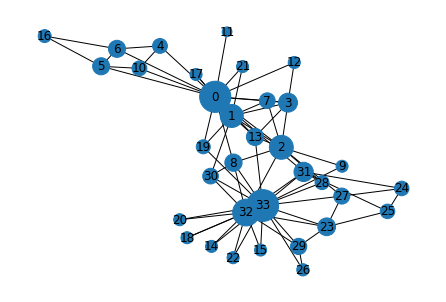

In [10]:
#@title
# Pagerank
print('\033[1mPagerank:\033[0m')
size_factor = []
for node, val in nx.pagerank(karate_club).items():
    print("%s %.2f" % (node, val))
    size_factor.append(val*10000)

nx.draw(karate_club, node_size=size_factor, with_labels=True)
plt.show()

### Betweenness Centrality

Nesse método, calcula-se a centralidade de um vértice em função da relação entre os caminhos de comprimento mínimo (shortest path) que passam pelo vértice $v$ e os caminhos de comprimento mínimo do grafo, como se segue:

$$c_b(v) = \sum_{s,t \in V} \frac{\sigma(s,t|v)}{\sigma(s,t)}  $$

Onde:

- V é o conjunto de vértices;

- $\sigma(s,t)$ é o número total de caminhos de comprimento mínimo (shortest path);

- $\sigma(s,t|v)$ é o número total de caminhos de comprimento mínimo (shortest path) que passam pelo vértice v (que não seja $s$ ou $t$);


Betweenness Centrality:
0 0.44
1 0.05
2 0.14
3 0.01
4 0.00
5 0.03
6 0.03
7 0.00
8 0.06
9 0.00
10 0.00
11 0.00
12 0.00
13 0.05
14 0.00
15 0.00
16 0.00
17 0.00
18 0.00
19 0.03
20 0.00
21 0.00
22 0.00
23 0.02
24 0.00
25 0.00
26 0.00
27 0.02
28 0.00
29 0.00
30 0.01
31 0.14
32 0.15
33 0.30


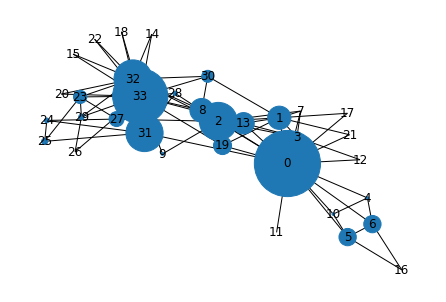

In [11]:
#@title
# Betweenness Centrality
print('\033[1mBetweenness Centrality:\033[0m')
size_factor = []
for node, val in nx.betweenness_centrality(karate_club).items():
    print("%s %.2f" % (node, val))
    size_factor.append(val*10000)

nx.draw(karate_club, node_size=size_factor, with_labels=True)
plt.show()

# Comunidades e partições

Uma aplicação de redes complexas é a classificação dos vértices em comunidades, o que permite observar relevância local e global dos vértices. A detecção de comunidades pode ser visto como similar a um problema de classificação não supervisionada, e os vértices com alto grau de densidade interna tendem a ser os mais relevantes para a formação inicial das comunidades.

Apesar de não fazer uso direto de conceitos da álgebra linear, muitos dos métodos de partição de grafos em comunidades e análise da qualidade da modulariadade de comunidades utilizam o conceito de centralidade, cuja formulação aplica autovalores, autovetores, combinações, etc, de forma que é possível inferir que o entendimento e correta aplicação de tais conceitos da álgebra linear são fundamentais para a boa aplicação de redes complexas.

A partição de grafos é uma ferramenta poderosa que permite dividir a rede em comunidades, sendo que cada vértice pertence a uma comunidade, sendo possível, porém, o overlap - que permite que um vértice participe em mais de um grupo. Um dos problemas da formação de comunidades é o alto número de partições possíveis, por exemplo uma rede com 15 vértices gera mais de 1 bilhão de partições possíveis.

A seguir se discorre, brevemente, sobre um método de partição e a medida de modularidade, que permite avaliar a qualidade das partições.

## Grau dos vértices

É possível observar que os vértices com maior grau (número de arestas que chegam em dado vértice) geralmente são os elencados como mais relevantes nas medidas de centralidade, e uma vez que quanto maior o grau maior tende a ser o link betweeness, esse parâmetro é relevante na formação de comunidades.

Grau dos vértices do grafo (sem peso, sem direção): 
(0, 16)
(1, 9)
(2, 10)
(3, 6)
(4, 3)
(5, 4)
(6, 4)
(7, 4)
(8, 5)
(9, 2)
(10, 3)
(11, 1)
(12, 2)
(13, 5)
(14, 2)
(15, 2)
(16, 2)
(17, 2)
(18, 2)
(19, 3)
(20, 2)
(21, 2)
(22, 2)
(23, 5)
(24, 3)
(25, 3)
(26, 2)
(27, 4)
(28, 3)
(29, 4)
(30, 4)
(31, 6)
(32, 12)
(33, 17)


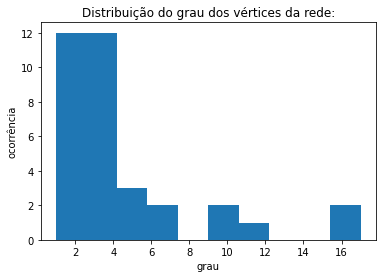

In [12]:
#@title
print('Grau dos vértices do grafo (sem peso, sem direção): ')
for node in karate_club.degree(): # podemos iterar sobre todos os vértices
    print(node) # tupla com o label do vértice e o grau correspondente

#print('vértice \'1\', peso', karate_club.degree('1')) # para saber o grau de um vértice em particular
#print('vértice 3, peso', karate_club.degree(3))

import math
import matplotlib.pyplot as plt

degrees = [val for (node, val) in karate_club.degree()]
plt.hist(degrees)
plt.xlabel('grau')
plt.ylabel('ocorrência')
plt.title("Distribuição do grau dos vértices da rede:")
plt.show()

## Método para definir Comunidades

### Método Girvan-Newman

Esse método busca remover pontes, ou seja, links que ligam 2 comunidades, de modo que separa comunidades em unidades - componentes conexos do grafo. Uma das medidas para escolher as pontes a serem removidas é o link betweeness dos vértices, sendo que maiores valores indicam que o vértice é uma ponte. É relevante destacar que os links internos de comunidades, embora possam tem alto link betweeness, não se espera sejam links preferenciais para remoção.

O algoritmo desse método tem a seguinte diretiva:

- Cálculo do betweeness para todos os links
- Iteração: remove o link com maior betweeness
- Recalcula o betweeness para os vértices remanescentes

Apesar de ser um método relativamente simples, ele tem baixa eficiencia - por conta do recalculo do link betweeness em cada iteração, além de ser um método divisivo, uma vez que quebra a rede ate que cada comunidade seja um vértice.

Uma aplicação desse método é vista a seguir, para o nível 1 (quebra de 2 pontes e geração de 3 comunidades) e para o nível 3 (quebra de 4 pontes e geração de 5 comunidades). Vale ressaltar que o nível 1 praticamente representa a classificação obtida por Zachary, sendo que o vértice #9 foi o único vértice que o mesmo classificou de forma errônea.

Nível 1: Quebra de 2 pontes e criação de 3 comunidades:
 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})


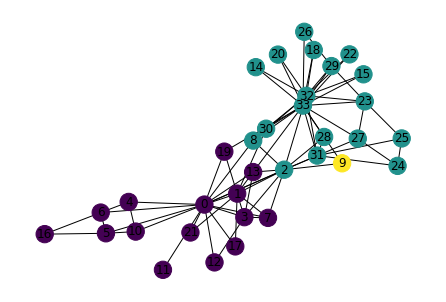

In [13]:
#@title
# método Girvan Newman
# nesse caso, o método retorna um iterador com as comunidades encontradas a cada iteração do algoritmo
node_sets = None
for lvl, comms in enumerate(nx.algorithms.community.centrality.girvan_newman(karate_club)):
    if lvl == 1:
        print("\033[1mNível 1: Quebra de 2 pontes e criação de 3 comunidades:\033[0m\n", comms)
        node_sets = comms
        colors = dict()
        for i, comm in enumerate(comms):
            for vtx in comm:
                colors[vtx] = i

# vamos colocar o grafo conforme as comunidades indentificadas no lvl = 1
node_color = []
for v in karate_club.nodes():
    node_color.append(colors[v])
nx.draw(karate_club,with_labels=True, node_color=node_color)
plt.show()

Nível 3: Quebra de 4 pontes e criação de 5 comunidades:
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})


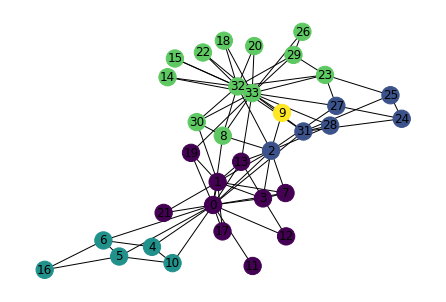

In [14]:
#@title
# método Girvan Newman
# nesse caso, o método retorna um iterador com as comunidades encontradas a cada iteração do algoritmo
node_sets = None
for lvl, comms in enumerate(nx.algorithms.community.centrality.girvan_newman(karate_club)):
    if lvl == 3:
        print("\033[1mNível 3: Quebra de 4 pontes e criação de 5 comunidades:\033[0m\n", comms)
        node_sets = comms
        colors = dict()
        for i, comm in enumerate(comms):
            for vtx in comm:
                colors[vtx] = i

# vamos colocar o grafo conforme as comunidades indentificadas no lvl = 1
node_color = []
for vtx in karate_club.nodes():
    node_color.append(colors[vtx])
nx.draw(karate_club, with_labels=True, node_color=node_color)
plt.show()

### Qualidade da modularidade

A qualidade da modularidade das partições pode ser avaliada observando algumas medidas, por exemplo se o resultado da partição promove poucas ligações entre grupos e muitas conexões internas. Outra medida é a comparação dos resultados com uma rede aleatória (modelo nulo), verificando quantas conexões, de fato, são acima do esperado caso a rede equivalente fosse uma rede aleatória. Esse parâmetro de qualidade objetiva informar se a partição está coesa.

Cabe citar algumas desvantagens da medida de modularidade, sendo que a mesma tende a ser maior em redes maiores e não corresponde, necessariamente, à melhor partição, uma vez que possui limite de resolução, prevenindo encontrar comunidades pequenas (tornam-se "invisíveis").

A fim de se observar a qualidade da modularidade das partições resultantes do Método Girvan-Newman, utiliza-se a função nx.algorithms.community.quality.modularity, cuja documentação explicita a seguinte formulação:

$$Q = \frac{1}{2m} \sum_{ij} \left( A_{ij} - \gamma\frac{k_ik_j}{2m}\right)\delta(c_i,c_j)$$

Em que:

- $m$ é o número de arestas;

- $A$ é a matriz de adjacência;

- $k_i$ é o grau do nó $i$;

- $\gamma$ é o resolution parameter - definido na documentação como "uma compensação arbitrária entre arestas intragrupo e arestas intergrupo. Padrões de agrupamento mais complexos podem ser descobertos analisando a mesma rede com vários valores de gama e, em seguida, combinando os resultados";

- $\delta(c_i, c_j) = 1$ se $i = j$ e $0$ caso contrário;

Essa equação pode ser reduzida para:

$$Q = \sum_{c=1}^{n}\left[ \frac{L_c}{m} - \gamma\left( \frac{k_c}{2m} \right) ^2 \right]$$

Na qual o somatório itera sobre todas as $c$ comunidades, e:

- $L_c$ é o número de arestas intragrupo da comunidade $c$;

- $k_c$ é o somatório dos graus dos nós pertencentes à comunidade $c$.

Adotando essa metodologia, obtem-se, para todas as partiçoes possíveis, os seguintes valores de qualidade de modularidade, sendo possível ressaltar que Qualidade da modularidade quando tomada a partição prevista por Zachary (nível 0) e a partição "real" (nível 1) são similares, e a melhor qualidade de modularidade é obtida no nível 3 (plotada acima).

In [15]:
#@title
# Qualidade da modularidade

nx.algorithms.community.quality.modularity(karate_club, node_sets)

# vamos verificar a modularidade gerada para cada iteração do algoritmo
for lvl, comms in enumerate(nx.algorithms.community.centrality.girvan_newman(karate_club)):
    mod = nx.algorithms.community.quality.modularity(karate_club, comms)
    print(f"\033[1mNível: {lvl}\tQualidade da modularidade: {mod :.2f}\033[0m\nComunidade: {comms}\n")

Nível: 0	Qualidade da modularidade: 0.36
Comunidade: ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

Nível: 1	Qualidade da modularidade: 0.35
Comunidade: ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})

Nível: 2	Qualidade da modularidade: 0.36
Comunidade: ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})

Nível: 3	Qualidade da modularidade: 0.40
Comunidade: ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})

Nível: 4	Qualidade da modularidade: 0.39
Comunidade: ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})

Nível: 5	Qualidade da modularidade: 0.38
Comunidade: ({

# Conclusão

Atualmente o volume de dados gerado nas mais diversas atividades cotidianas ultrapassa o limite de processamento, armazenamento e mineração disponíveis. Paradoxalmente, o poderio e capacidade computacional atuais permitem realizar análises e inferências com precisão e de forma expedita, desde que corretamente empregados e se aliados com ferramentas de análise robustas.

As Redes Complexas são uma importante ferramenta para a manipulação de dados, dada sua relativa simplicidade de formulação, com amplo emprego de conceitos da álgebra linear, como auto-valores, autovetores, representação e manipulação matricial, etc, permitindo sua aplicação computacional de forma fluída e natural. Uma vez que essa ferramenta permite análises de quantidades massivas de dados e retorna resultados importantes, como a formação de comunidades, importância de certos nós frente aos demais, entre outros parâmetros, faz-se de extrema importância o estudo de tal ferramental. 

Desta maneira, o presente trabalho buscou elucidar algumas das principais aplicações de Redes Complexas, analisando as formulações por detrás dos algoritimos implementados na biblioteca NetworkX, bem como entendendo como conceitos de Álgebra Linear são aplicados computacionalmente, verificando a relevância de tais conceitos e a acurácia dos resultados depreendidos de métodos que os empreguem.

# Referências Bibliográficas

EABD USP 2022 - Modelagem e Caracterização de Redes Complexas Diego Raphael Amancio

Documentação do NetworkX 2.8.8. Disponível em: <https://networkx.org/documentation/stable/index.html>. Acesso em: 20 nov. 2022.

APPEL, Ana Paula, HRUSCHKA JR, Estevam Rafael. Tópicos em banco de dados, multimídia e Web .XVII Simpósio Brasileiro de Sistemas Multimídia e Web, XXVI Simpósio Brasileiro de Banco de Dados, Editora: Sociedade Brasileira de Computação. Florianópolis, 2011. 

SILVA, Filipi Nascimento. Dimensão e simetria em redes complexas: uma abordagem multiescala. Tese (Doutorado em Física Computacional) - Instituto de Física de São Carlos, Universidade de São Paulo, São Carlos, 2015.

sem autor: Zachary's Karate Club Disponível em: <https://en.wikipedia.org/wiki/Zachary%27s_karate_club>. Acesso em: 20 nov. 2022.